# Import Modules

In [1]:
# For data processing
import numpy as np
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sb
plt.style.use('fivethirtyeight') 

# For data splitting
from sklearn.model_selection import train_test_split

# For handling imbalanced dataset
from imblearn.combine import SMOTETomek
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [2]:
# Select several columns
cols = ['IMDb-rating', 'appropriate_for', 'director', 'downloads',
        'industry', 'language', 'posted_date', 'release_date',
        'run_time','storyline', 'title','views','writer']

# Read the dataset and select the columns
df = pd.read_csv('cleaned-df.csv', index_col=0)[cols]

# Create a new column 'in_en', 1 if the original language is in English and 0 otherwise
df['in_en'] = (df['language'] == 'English').astype('int64')

df = df.drop(columns=['language'])

df = df[[ 'appropriate_for','director', 'downloads',
        'industry', 'posted_date', 'release_date',
        'run_time','storyline', 'title','views','writer','IMDb-rating']]

df.head()

,appropriate_for,director,downloads,industry,posted_date,release_date,run_time,storyline,title,views,writer,IMDb-rating
0,R,John Swab,304.0,Hollywood / English,"20 Feb, 2023",Jan 28 2023,105.0,Doc\r\n facilitates a fragile truce between th...,Little Dixie,2794.0,John Swab,4.8
1,TV-PG,Paul Ziller,73.0,Hollywood / English,"20 Feb, 2023",Feb 05 2023,84.0,Caterer\r\n Goldy Berry reunites with detectiv...,Grilling Season: A Curious Caterer Mystery,1002.0,John Christian Plummer,6.4
2,R,Ben Wheatley,1427.0,Hollywood / English,"20 Apr, 2021",Jun 18 2021,107.0,As the world searches for a cure to a disastro...,In the Earth,14419.0,Ben Wheatley,5.2
7,R,Benjamin Caron,1781.0,Hollywood / English,"13 Feb, 2023",Feb 17 2023,116.0,"Motivations are suspect, and expectations are ...",Sharper,18225.0,"Brian Gatewood, Alessandro Tanaka",6.5
8,PG-13,Ravi Kapoor,458.0,Hollywood / English,"18 Feb, 2023",Dec 02 2022,80.0,An\r\n unmotivated South Asian American rapper...,Four Samosas,6912.0,Ravi Kapoor,6.9


In [3]:
# Split the DF into predictors and response
X, y = df.iloc[:, :-1], df.iloc[:, -1]

# Define good as vote_average >= 7
y = (y >= 7).astype('int64')

# Split the dataset into 70% train and 30% test set
# Set random_state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=20)

In [4]:
print("Good vs Not Good Movies Train Set Proportion")
print(y_train.value_counts()[1], ':', y_train.value_counts()[0])

Good vs Not Good Movies Train Set Proportion
1299 : 5680


In [5]:
train_df = pd.concat([X_train, y_train], axis=1).rename(columns={'IMDb-rating': 'is_good'})
train_df.head()

,appropriate_for,director,downloads,industry,posted_date,release_date,run_time,storyline,title,views,writer,is_good
15371,R,"Colin Strause, Greg Strause",24628.0,Hollywood / English,"10 Mar, 2014",Mar 14 2008,94.0,Warring alien and predator races descend on a ...,Aliens vs Predator - Requiem,76913.0,"Shane Salerno, Dan O'Bannon, Ronald Shusett",0
13797,R,Alejandro González Iñárritu,7462.0,Hollywood / English,"09 Jan, 2015",Nov 14 2014,119.0,"Riggan Thomas, once known quite well to movie ...",Birdman,25712.0,"Alejandro González Iñárritu, Nicolás Giacobone...",1
11762,Not Rated,Rick Morales,3730.0,Anime / Kids,"28 Apr, 2016",May 03 2016,75.0,"Oooh Hollywood! The glitz, the glam...the Head...",Lego Scooby-Doo!: Haunted Hollywood,22398.0,"Heath Corson, Duane Capizzi, James Krieg",0
9929,Not Rated,Doug Archibald,954.0,Hollywood / English,"14 Jun, 2017",Jun 09 2017,90.0,Krystal and her twin brother/roommate confront...,I Love You Both,12098.0,"Doug Archibald, Kristin Archibald",0
15019,PG-13,J.C. Chandor,26818.0,Hollywood / English,"30 Jan, 2014",Nov 07 2013,106.0,"Deep into a solo voyage in the Indian Ocean, a...",All Is Lost,88559.0,J.C. Chandor,0


In [6]:
train_df.to_csv('train.csv')

# Random Oversampling on training data

In [7]:
!pip install imbalanced-learn

In [8]:
# Define oversampling strategy (creates 1:2 ratio)
over_smp = RandomOverSampler(sampling_strategy=0.5, random_state=20)

# Fit and apply the transform
X_res, y_res = over_smp.fit_resample(X_train, y_train)

In [9]:
print("Good vs Not Good Movies Train Set Proportion (After oversampling)")
print(y_res.value_counts()[1], ':', y_res.value_counts()[0])

Good vs Not Good Movies Train Set Proportion (After oversampling)
2840 : 5680


In [10]:
# Combine the X and y to a single DF and rename column
oversampled_train_df = pd.concat([X_res, y_res], axis=1).rename(columns={'IMDb-rating': 'is_good'})
oversampled_train_df.head()

,appropriate_for,director,downloads,industry,posted_date,release_date,run_time,storyline,title,views,writer,is_good
0,R,"Colin Strause, Greg Strause",24628.0,Hollywood / English,"10 Mar, 2014",Mar 14 2008,94.0,Warring alien and predator races descend on a ...,Aliens vs Predator - Requiem,76913.0,"Shane Salerno, Dan O'Bannon, Ronald Shusett",0
1,R,Alejandro González Iñárritu,7462.0,Hollywood / English,"09 Jan, 2015",Nov 14 2014,119.0,"Riggan Thomas, once known quite well to movie ...",Birdman,25712.0,"Alejandro González Iñárritu, Nicolás Giacobone...",1
2,Not Rated,Rick Morales,3730.0,Anime / Kids,"28 Apr, 2016",May 03 2016,75.0,"Oooh Hollywood! The glitz, the glam...the Head...",Lego Scooby-Doo!: Haunted Hollywood,22398.0,"Heath Corson, Duane Capizzi, James Krieg",0
3,Not Rated,Doug Archibald,954.0,Hollywood / English,"14 Jun, 2017",Jun 09 2017,90.0,Krystal and her twin brother/roommate confront...,I Love You Both,12098.0,"Doug Archibald, Kristin Archibald",0
4,PG-13,J.C. Chandor,26818.0,Hollywood / English,"30 Jan, 2014",Nov 07 2013,106.0,"Deep into a solo voyage in the Indian Ocean, a...",All Is Lost,88559.0,J.C. Chandor,0


In [11]:
# Save as csv
oversampled_train_df.to_csv('oversampled-train.csv')

# Random Undersampling on training data

In [12]:
# Define oversampling strategy (creates 1:2 ratio)
under_smp = RandomUnderSampler(sampling_strategy=0.5, random_state=20)

# Fit and apply the transform
X_res, y_res = under_smp.fit_resample(X_train, y_train)

In [13]:
print("Good vs Not Good Movies Train Set Proportion (After oversampling)")
print(y_res.value_counts()[1], ':', y_res.value_counts()[0])

Good vs Not Good Movies Train Set Proportion (After oversampling)
1299 : 2598


In [14]:
# Combine the X and y to a single DF and rename column
undersampled_train_df = pd.concat([X_res, y_res], axis=1).rename(columns={'IMDb-rating': 'is_good'})
undersampled_train_df.head()

,appropriate_for,director,downloads,industry,posted_date,release_date,run_time,storyline,title,views,writer,is_good
0,Not Rated,Hanumantha Rao Raghavapudi,46655.0,Tollywood,"04 Nov, 2017",Aug 11 2017,145.0,LIE revolves around a guy named A. Satyam and ...,LIE,151239.0,Hanumantha Rao Raghavapudi,0
1,Not Rated,Mark McQueen,6400.0,Hollywood / English,"15 Oct, 2010",Jan 01 1970,92.0,"As the world succumbs to a zombie apocalypse, ...",Devil's Playground,14079.0,Bart Ruspoli,0
2,Not Rated,Nadeem Soumah,4198.0,Hollywood / English,"04 Aug, 2015",Jul 31 2015,103.0,"Sonny ""Sundown"" Garcia is the top North Americ...",6 Ways To Die,20524.0,Nadeem Soumah,0
3,Not Rated,Katta Deva,55971.0,Bollywood / Indian,"21 Sep, 2019",Sep 20 2019,141.0,A rural politician marries a widow with kids a...,Prasthanam,171426.0,Jayesh Parmar,0
4,R,John Swab,377.0,Hollywood / English,"20 Feb, 2023",Jan 28 2023,105.0,Doc\r\n facilitates a fragile truce between th...,Little Dixie,3636.0,John Swab,0


In [15]:
# Save as csv
oversampled_train_df.to_csv('undersampled-train.csv')

# SMOTETomek Resampling on training data

This only applies for numerical variables.

In [16]:
# Select numerical variables only
X_train = X_train[['downloads',
                   'run_time', 'views']]

X_train.head()

,downloads,run_time,views
15371,24628.0,94.0,76913.0
13797,7462.0,119.0,25712.0
11762,3730.0,75.0,22398.0
9929,954.0,90.0,12098.0
15019,26818.0,106.0,88559.0


In [17]:
# Set random_state for reproducibility
smt = SMOTETomek(random_state=2)
X_res, y_res = smt.fit_resample(X_train, y_train)

In [18]:
print("Good vs Not Good Movies Train Set Proportion (After SMOTETomek resampling)")
print(y_res.value_counts()[1], ':', y_res.value_counts()[0])

Good vs Not Good Movies Train Set Proportion (After SMOTETomek resampling)
5071 : 5071


In [19]:
# Combine the X and y to a single DF and rename column
smotetomek_train_df = pd.concat([X_res, y_res], axis=1).rename(columns={'IMDb-rating': 'is_good'})
smotetomek_train_df.head()

,downloads,run_time,views,is_good
0,7462.0,119.0,25712.0,1
1,3730.0,75.0,22398.0,0
2,954.0,90.0,12098.0,0
3,1720.0,97.0,8057.0,0
4,761.0,88.0,7466.0,0


In [20]:
# Save as csv
smotetomek_train_df.to_csv('smotetomek-train.csv')

# SMOTEENN Resampling on training data

Similar with SMOTETomek resampling, this only applies for numerical variables.

In [21]:
X_train = X_train[['downloads',
                   'run_time', 'views']]
X_train.head()

,downloads,run_time,views
15371,24628.0,94.0,76913.0
13797,7462.0,119.0,25712.0
11762,3730.0,75.0,22398.0
9929,954.0,90.0,12098.0
15019,26818.0,106.0,88559.0


In [22]:
# Set random_state for reproducibility
sme = SMOTEENN(random_state=20)
X_res, y_res = sme.fit_resample(X_train, y_train)

In [23]:
print("Good vs Not Good Movies Train Set Proportion (After SMOTEENN resampling)")
print(y_res.value_counts()[1], ':', y_res.value_counts()[0])

Good vs Not Good Movies Train Set Proportion (After SMOTEENN resampling)
3241 : 2895


In [24]:
# Combine the X and y to a single DF and rename column
smoteenn_train_df = pd.concat([X_res, y_res], axis=1).rename(columns={'IMDb-rating': 'is_good'})
smoteenn_train_df.head()

,downloads,run_time,views,is_good
0,3730.0,75.0,22398.0,0
1,954.0,90.0,12098.0,0
2,761.0,88.0,7466.0,0
3,2718.0,109.0,14838.0,0
4,11518.0,93.0,35438.0,0


In [25]:
# Save as csv
smoteenn_train_df.to_csv('smoteenn-train.csv')

# Save test data as csv

In [26]:
# Combine the X and y to a single DF and rename column
test_df = pd.concat([X_test, y_test], axis=1).rename(columns={'IMDb-rating': 'is_good'})
test_df.head()

,appropriate_for,director,downloads,industry,posted_date,release_date,run_time,storyline,title,views,writer,is_good
15414,PG-13,Brian Percival,7141.0,Hollywood / English,"11 Jan, 2014",Nov 27 2013,131.0,"Based on the beloved bestselling book, THE BOO...",The Book Thief,29132.0,"Markus Zusak, Michael Petroni",1
14775,R,Víctor García,8736.0,Hollywood / English,"02 Aug, 2014",Aug 29 2014,87.0,A family are involved in an accident and take ...,Gallows Hill (The Damned),29801.0,"Richard D'Ovidio, Richard D'Ovidio",0
330,PG-13,Sarah Polley,231.0,Hollywood / English,"27 Dec, 2022",Jan 06 2023,104.0,Do\r\n nothing. Stay and fight. Or leave. In 2...,Women Talking,4032.0,"Sarah Polley, Miriam Toews",1
7048,PG-13,Tyler Perry,476.0,Hollywood / English,"15 Apr, 2019",Mar 01 2019,109.0,A joyous reunion in small-town Georgia turns i...,A Madea Family Funeral,6436.0,Tyler Perry,0
13056,PG-13,Sam Liu,7573.0,Anime / Kids,"13 Jul, 2015",Jul 28 2015,76.0,"In an alternate universe, very different versi...",Justice League: Gods and Monsters,33154.0,"Alan Burnett, Bruce W. Timm, Bob Kane",1


In [27]:
#Save as csv
test_df.to_csv('test.csv')

# Visualisation of resampled data

In [28]:
oversampled_train_df = pd.read_csv('oversampled-train.csv',index_col= 0)
undersampled_train_df = pd.read_csv('undersampled-train.csv',index_col= 0)
smoteenn_train_df = pd.read_csv('smoteenn-train.csv',index_col= 0)
smotetomek_train_df = pd.read_csv('smotetomek-train.csv',index_col= 0)
train_df = pd.read_csv('train.csv',index_col=0)

Text(0.5, 0, 'is_good - SMOTEENN resampling')

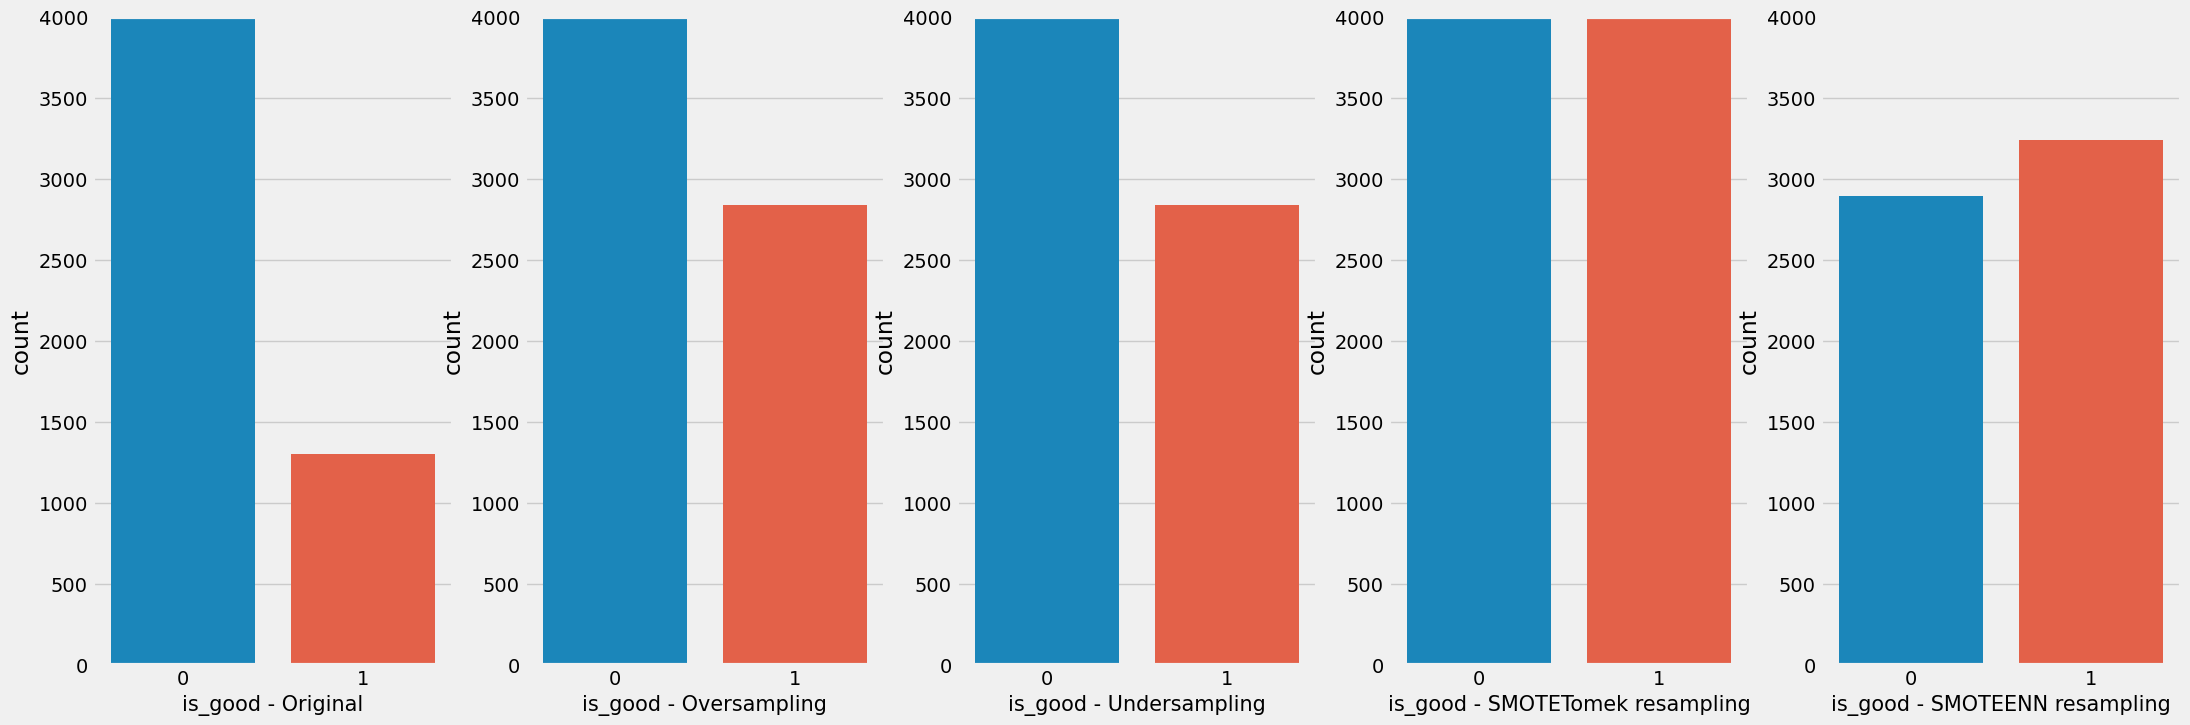

In [29]:
fig, axes =plt.subplots(1,5,figsize=(24,8))
plt.setp(axes,ylim=(0,4000))
sb.countplot(x=train_df['is_good'], ax=axes[0])
ax = axes[0]
ax.set_xlabel("is_good - Original",fontsize=15)
sb.countplot(x=oversampled_train_df['is_good'], ax=axes[1])
ax = axes[1]
ax.set_xlabel("is_good - Oversampling",fontsize=15)
sb.countplot(x=undersampled_train_df['is_good'], ax=axes[2])
ax = axes[2]
ax.set_xlabel("is_good - Undersampling",fontsize=15)
sb.countplot(x=smotetomek_train_df['is_good'], ax=axes[3])
ax = axes[3]
ax.set_xlabel("is_good - SMOTETomek resampling",fontsize=15)
sb.countplot(x=smoteenn_train_df['is_good'], ax=axes[4])
ax = axes[4]
ax.set_xlabel("is_good - SMOTEENN resampling",fontsize=15)

Therefore, we can now see that the ratio between good vs not good movies is more balanced with the resampled data vs the original data.